Realitza la pràctica del punt 3.4 del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips". 

Executar el ipynb de l'Alex

In [286]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
tips = pd.read_csv('./dades/tips.csv', sep = ',')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
tips.shape

(244, 7)

In [18]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [20]:
tips.day.unique()


array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [21]:
tips.day = pd.Categorical(tips.day,categories=['Thur', 'Fri','Sat', 'Sun'], ordered=True)

In [23]:
tips.day.dtypes

CategoricalDtype(categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=True)

   total_bill   tip     sex smoker  day    time  size  tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2     6.32
1       10.34  1.66    Male     No  Sun  Dinner     3    19.12
2       21.01  3.50    Male     No  Sun  Dinner     3    19.99
3       23.68  3.31    Male     No  Sun  Dinner     2    16.25
4       24.59  3.61  Female     No  Sun  Dinner     4    17.21


<AxesSubplot:xlabel='day', ylabel='tip_pct'>

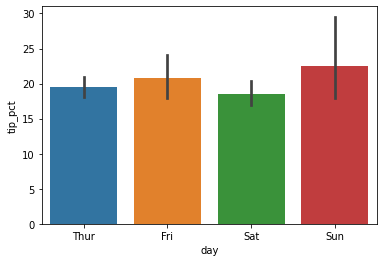

In [25]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
print(tips.head())

sns.barplot(y='tip_pct', x='day', data=tips, orient="v")

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

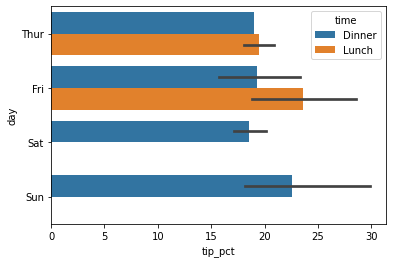

In [26]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [29]:
sns.set(style="darkgrid")
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [30]:
round(tips.describe(include='all'), 3)


,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


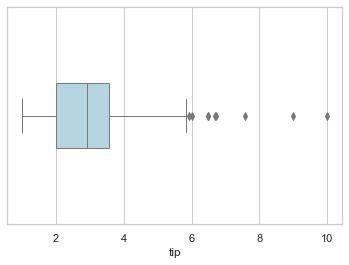

In [31]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], data=tips,color='lightblue', fliersize=5, orient='h', linewidth=1, width=0.3)

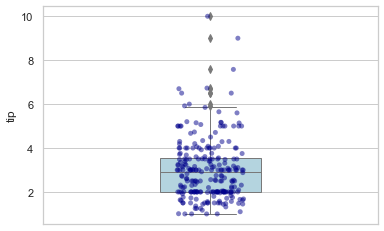

In [32]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)


<AxesSubplot:ylabel='tip_pct'>

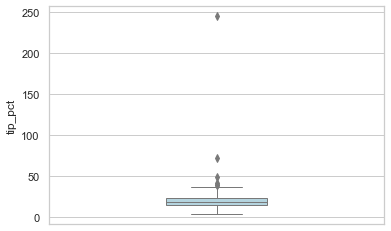

In [33]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

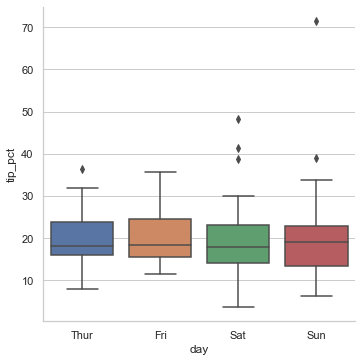

In [34]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245])

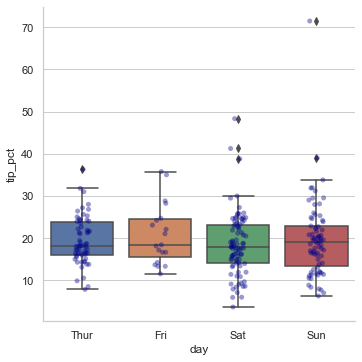

In [35]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245])

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4)

<AxesSubplot:xlabel='day', ylabel='tip_pct'>

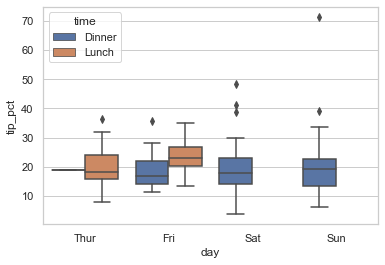

In [36]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245])

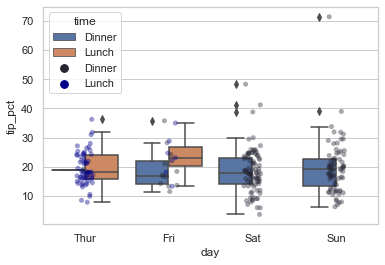

In [37]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4)

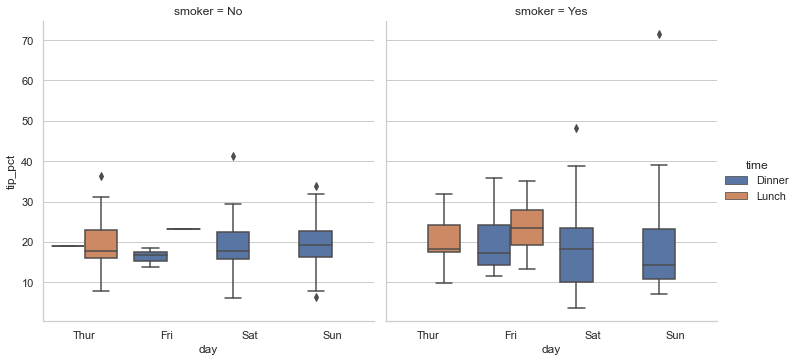

In [38]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245])

### DATASET --> MOVIES

In [165]:
movies = pd.read_table('./dades/movies.dat', sep = '::',header=None,names = ['movie_id','titulo','genero'])
movies.head()

/home/vant/.local/lib/python3.8/site-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,movie_id,titulo,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [166]:
# miramos cuantos generos diferentes hay
generos = []
for x in movies.genero:
    items =x.split('|')
    generos.extend(items)
    
generos = pd.unique(generos)
print(generos,len(generos))

['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western'] 18


In [167]:
# crear matriz de dummies en funcion de los diferentes generos
cero_matriz = np.zeros((len(movies), len(generos)))
df_dummies = pd.DataFrame(cero_matriz, columns = generos)

In [168]:
# asigno 1 a cada columna que tenga aquel genero
for i, gen in enumerate(movies.genero):
    lista_generos = gen.split('|')
    indices = df_dummies.columns.get_indexer(gen.split('|'))    
    df_dummies.iloc[i, indices] = 1

In [169]:
pd.set_option('display.max_columns', None)
df_movies = movies.join(df_dummies)
df_movies.head()

,movie_id,titulo,genero,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
def extraer_año(text):
    pattern =r'[^\(]\d+[^)]' # busca uno o mas digitos seguidos para el año
    values = [x for x in re.findall(pattern,text)] # retorna lista de numeros
    #print(values)
    for year in values:
        if year.startswith('19'):
            break            
    year = pd.to_datetime(year,format='%Y')
    return year

In [260]:
row = 3775
row = 46
row = 0
print(df_movies.iloc[row]['titulo'])
print(extraer_año(df_movies.titulo.values[row]))

Toy Story (1995)
1995-01-01 00:00:00


In [261]:
df_movies['year']= df_movies['titulo'].apply(extraer_año)

In [262]:
df_movies['title'] = df_movies['titulo'].str[:-7] # quitar el año de esta columns

In [263]:
df_movies.head()

,movie_id,titulo,genero,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,year,title
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Toy Story
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Father of the Bride Part II


In [265]:
movies_clean= df_movies.drop(['genero','titulo'],axis=1)

In [266]:
movies_clean.describe(include='all').round(3)
# hay 3841 titlos unicos --> hay titulos repetidos

<ipython-input-266-46bbfa36c1bc>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  movies_clean.describe(include='all').round(3)


,movie_id,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,year,title
count,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883,3883
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,3841
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-01-01 00:00:00,Hamlet
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345,5
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-01 00:00:00,NaN
mean,1986.049,0.027,0.065,0.309,0.073,0.018,0.121,0.413,0.130,0.054,0.127,0.088,0.071,0.033,0.037,0.029,0.027,0.011,0.018,NaN,NaN
std,1146.778,0.162,0.246,0.462,0.260,0.131,0.327,0.492,0.336,0.227,0.333,0.284,0.257,0.178,0.188,0.169,0.163,0.106,0.131,NaN,NaN
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN
25%,982.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN


In [267]:
movies_clean.head()

,movie_id,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,year,title
0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Toy Story
1,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Jumanji
2,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Grumpier Old Men
3,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Waiting to Exhale
4,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Father of the Bride Part II


In [268]:
movies_clean.title.value_counts(ascending=False)[:5]
# vemos que hay varios titulos repetidos

Hamlet               5
Mummy, The           3
Othello              2
Godzilla (Gojira)    2
Loser                2
Name: title, dtype: int64

In [269]:
movies_clean[movies_clean.title == 'Hamlet']
#vemos que son pelis con el mismo titutlo pero con movie_id y año diferente


,movie_id,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,year,title
1388,1411,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996-01-01,Hamlet
1872,1941,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1948-01-01,Hamlet
2751,2820,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1964-01-01,Hamlet
3529,3598,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000-01-01,Hamlet
3654,3723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990-01-01,Hamlet


In [270]:
movies_clean.head()

,movie_id,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,year,title
0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Toy Story
1,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Jumanji
2,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Grumpier Old Men
3,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Waiting to Exhale
4,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01,Father of the Bride Part II


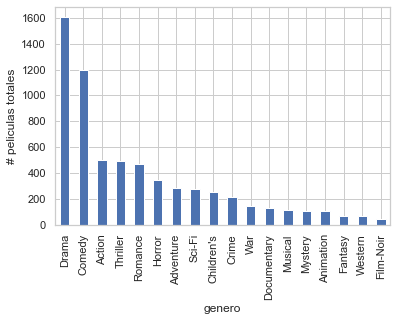

In [373]:
movies_clean[generos].sum().sort_values(ascending=False).plot.bar()
plt.ylabel('# peliculas totales')
plt.xlabel('genero')
# numero de peliculas por genero
top_generos = movies_clean[generos].sum().sort_values(ascending=False)[:10].index

In [377]:
top_generos=top_generos.to_numpy()

In [368]:
print()
df_year_sum = movies_clean.groupby(by='year',as_index=True).sum()

<AxesSubplot:xlabel='year'>

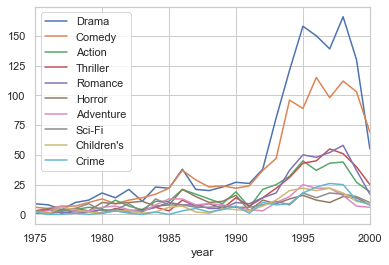

In [388]:
df_year_sum.loc['1975':][top_generos].plot()

<AxesSubplot:>

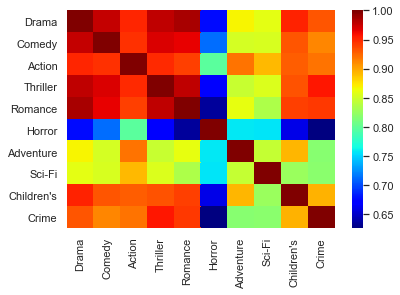

In [387]:
sns.heatmap(df_year_sum[top_generos].corr(),cmap='jet')